In [ ]:
import torch

In [ ]:
# Get cpu, gpu or mps device for training.
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
print(f"Using {device} device")

Using cuda device


In [ ]:
!git clone https://github.com/LinDuoming/LogEval.git

Cloning into 'LogEval'...
remote: Enumerating objects: 304, done.
remote: Counting objects: 100% (50/50), done.
remote: Compressing objects: 100% (37/37), done.
remote: Total 304 (delta 21), reused 29 (delta 11), pack-reused 254 (from 1)
Receiving objects: 100% (304/304), 3.57 MiB | 21.39 MiB/s, done.
Resolving deltas: 100% (96/96), done.


In [ ]:
%cd LogEval

/content/LogEval


In [ ]:
!pip install -r requirements.txt


!pip install transformers accelerate sentencepiece
!pip install -q bitsandbytes

[Errno 2] No such file or directory: 'LogEval'
/content/LogEval
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.9/60.9 kB 4.2 MB/s eta 0:00:00
ERROR: Ignored the following versions that require a different python version: 1.21.2 Requires-Python >=3.7,<3.11; 1.21.3 Requires-Python >=3.7,<3.11; 1.21.4 Requires-Python >=3.7,<3.11; 1.21.5 Requires-Python >=3.7,<3.11; 1.21.6 Requires-Python >=3.7,<3.11
ERROR: Could not find a version that satisfies the requirement pybabel==0.0.0.dev0 (from versions: none)
ERROR: No matching distribution found for pybabel==0.0.0.dev0
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 117.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 95.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 57.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
!ls -l
!ls -l app.py datasrc.py

total 140
-rw-r--r-- 1 root root  7128 Jul 10 07:11 app.py
-rw-r--r-- 1 root root   100 Jul 10 07:11 babel.cfg
-rw-r--r-- 1 root root   498 Jul 10 07:11 datasrc.py
-rw-r--r-- 1 root root   105 Jul 10 07:11 index.html
-rw-r--r-- 1 root root 74412 Jul 10 07:11 leaderboard.csv
-rw-r--r-- 1 root root  6083 Jul 10 07:11 messages.pot
-rw-r--r-- 1 root root   209 Jul 10 07:11 news.json
drwxr-xr-x 3 root root  4096 Jul 10 07:11 old_proj
-rw-r--r-- 1 root root  5838 Jul 10 07:11 readme.md
-rw-r--r-- 1 root root   335 Jul 10 07:11 requirements.txt
drwxr-xr-x 2 root root  4096 Jul 10 07:11 static
-rw-r--r-- 1 root root    25 Jul 10 07:11 submitted.csv
drwxr-xr-x 2 root root  4096 Jul 10 07:11 templates
drwxr-xr-x 3 root root  4096 Jul 10 07:11 translations
-rw-r--r-- 1 root root 7128 Jul 10 07:11 app.py
-rw-r--r-- 1 root root  498 Jul 10 07:11 datasrc.py


In [ ]:
from transformers import AutoModelForCausalLM, AutoTokenizer, BitsAndBytesConfig
from huggingface_hub import login


hf_token = "your_token"
login(token=hf_token)

model_id_mistral = "mistralai/Mistral-7B-Instruct-v0.2"


bnb_config = BitsAndBytesConfig(
    load_in_4bit=True,
    bnb_4bit_quant_type="nf4",
    bnb_4bit_compute_dtype=torch.bfloat16
)

print(f"Loading tokenizer for {model_id_mistral}...")
tokenizer_mistral = AutoTokenizer.from_pretrained(model_id_mistral)
print("Tokenizer loaded.")

print(f"Loading model {model_id_mistral} with 4-bit quantization...")
model_mistral = AutoModelForCausalLM.from_pretrained(
    model_id_mistral,
    quantization_config=bnb_config,
    device_map="auto"
)
print("Mistral-7B-Instruct-v0.2 loaded successfully!")

# Mistral example
messages = [
    {"role": "user", "content": "What is log parsing?"}
]
input_ids = tokenizer_mistral.apply_chat_template(messages, tokenize=True, add_generation_prompt=True, return_tensors="pt").to("cuda")

print("\nGenerating a test response from Mistral-7B-Instruct-v0.2...")
outputs = model_mistral.generate(input_ids, max_new_tokens=200, do_sample=True, temperature=0.7, top_k=50, top_p=0.95)
response_mistral = tokenizer_mistral.decode(outputs[0], skip_special_tokens=True)
print("Mistral Response:")
print(response_mistral)

Loading tokenizer for mistralai/Mistral-7B-Instruct-v0.2...


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/2.10k [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/493k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.80M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/414 [00:00<?, ?B/s]

Tokenizer loaded.
Loading model mistralai/Mistral-7B-Instruct-v0.2 with 4-bit quantization...


config.json:   0%|          | 0.00/596 [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/25.1k [00:00<?, ?B/s]

Fetching 3 files:   0%|          | 0/3 [00:00<?, ?it/s]

model-00001-of-00003.safetensors:   0%|          | 0.00/4.94G [00:00<?, ?B/s]

model-00002-of-00003.safetensors:   0%|          | 0.00/5.00G [00:00<?, ?B/s]

model-00003-of-00003.safetensors:   0%|          | 0.00/4.54G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/111 [00:00<?, ?B/s]

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
The attention mask is not set and cannot be inferred from input because pad token is same as eos token. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.


Mistral-7B-Instruct-v0.2 loaded successfully!

Generating a test response from Mistral-7B-Instruct-v0.2...
Mistral Response:
[INST] What is log parsing? [/INST] Log parsing is the process of extracting and analyzing data from text files or databases that contain records of events or transactions, often referred to as logs. Logs are typically generated by various systems and applications, such as web servers, firewalls, or network devices, and can provide valuable information for monitoring, troubleshooting, and security purposes.

The log parsing process involves using specialized tools or scripts to read and interpret the log data, extract specific fields or information, and convert it into a structured format that can be easily analyzed and queried. This can be done manually or automatically using log parsing software or scripts.

Log parsing can help organizations gain insights into system performance, identify and diagnose issues, monitor security threats, and maintain compliance w

In [ ]:
def get_mistral_response(log_entry, instruction, model, tokenizer, max_new_tokens=200):

    messages = [
        {"role": "system", "content": "You are a helpful assistant for log analysis. Provide concise and accurate answers."},
        {"role": "user", "content": f"{instruction}\nLog entry: {log_entry}"}
    ]


    input_ids = tokenizer.apply_chat_template(messages, tokenize=True, add_generation_prompt=True, return_tensors="pt").to(model.device)


    outputs = model.generate(input_ids,
                             max_new_tokens=max_new_tokens,
                             do_sample=True,
                             temperature=0.7,
                             top_k=50,
                             top_p=0.95,
                             pad_token_id=tokenizer.eos_token_id)


    response = tokenizer.decode(outputs[0], skip_special_tokens=True)


    if "[/INST]" in response:
        response = response.split("[/INST]", 1)[1].strip()

    return response

In [ ]:
log_example_parse = "12-10-2023 10:30:00 INFO User 'admin' logged in from IP 192.168.1.100."
instruction_parse = "Parse the following log entry into a template format, replacing variable parts with a wildcard <*>:"

response_parse = get_mistral_response(log_example_parse, instruction_parse, model_mistral, tokenizer_mistral)
print(f"\nResponse for Log Parsing:\n{response_parse}")


log_example_anomaly = "12-10-2023 11:45:10 ERROR High CPU utilization detected on serverXYZ (98%)."
instruction_anomaly = "Review the log entry and explicitly mark it as 'normal' or 'abnormal', only output 'normal' or 'abnormal'."

response_anomaly = get_mistral_response(log_example_anomaly, instruction_anomaly, model_mistral, tokenizer_mistral, max_new_tokens=50) # max_new_tokens کمتر برای پاسخ‌های کوتاه
print(f"\nResponse for Log Anomaly Detection:\n{response_anomaly}")


Response for Log Parsing:
Template format: [Date] [Time] [Log Level] [Description]: [Date] <*>:[Time] <*>: [Log Level] User '<admin>' logged in from IP '<192.168.1.*.*>'.

So, the parsed log entry would look like:

[12-10-2023] [10:30:00] [INFO] [Description]: [12-10-2023] <*>:[10:30:00] <INFO> User '<admin>' logged in from IP '<192.168.1.100>.*>'.

Response for Log Anomaly Detection:
abnormal.


In [ ]:
!pip install rouge_score scikit-learn Levenshtein

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 161.7/161.7 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 70.2 MB/s eta 0:00:00
  Created wheel for rouge_score: filename=rouge_score-0.1.2-py3-none-any.whl size=24934 sha256=4966d612216b56db649bb8cd05a2995c42713e6e720fe86b126359e816b7f892
  Stored in directory: /root/.cache/pip/wheels/1e/19/43/8a442dc83660ca25e163e1bd1f89919284ab0d0c1475475148
Successfully built rouge_score


In [ ]:
import torch
from transformers import AutoModelForCausalLM, AutoTokenizer, BitsAndBytesConfig
from huggingface_hub import login
import os
import pandas as pd
import json
import datetime
import re
import time
from sklearn.metrics import f1_score, accuracy_score
from rouge_score import rouge_scorer
import Levenshtein
from sentence_transformers import SentenceTransformer, util

sbert_model = None
try:
    print("Loading SentenceTransformer model for Cosine Similarity...")

    sbert_model = SentenceTransformer('all-MiniLM-L6-v2', device='cuda' if torch.cuda.is_available() else 'cpu')
    print("SentenceTransformer model loaded.")
except Exception as e:
    print(f"Warning: Could not load SentenceTransformer model for Cosine Similarity: {e}")
    print("Cosine Similarity will not be calculated. Please ensure 'sentence_transformers' is installed and check available RAM.")
    sbert_model = None


hf_token = os.environ.get("HF_TOKEN", "your_token")

try:
    login(token=hf_token)
    print("Logged in to Hugging Face successfully.")
except Exception as e:
    print(f"Failed to log in to Hugging Face: {e}")
    print("Please ensure your HF_TOKEN is correct and has access to the model.")

model_id_mistral = "mistralai/Mistral-7B-Instruct-v0.2"

bnb_config = BitsAndBytesConfig(
    load_in_4bit=True,
    bnb_4bit_quant_type="nf4",
    bnb_4bit_compute_dtype=torch.bfloat16
)

try:
    print(f"Loading tokenizer for {model_id_mistral}...")
    tokenizer_mistral = AutoTokenizer.from_pretrained(model_id_mistral)
    print("Tokenizer loaded.")

    print(f"Loading model {model_id_mistral} with 4-bit quantization and CPU offload...")
    model_mistral = AutoModelForCausalLM.from_pretrained(
        model_id_mistral,
        quantization_config=bnb_config,
        device_map="auto",

    )
    print("Mistral-7B-Instruct-v0.2 loaded successfully with offload!")
except Exception as e:
    print(f"Error loading Mistral model: {e}")
    model_mistral = None
    tokenizer_mistral = None
    print("Mistral-7B will not be available for benchmarking.")

def get_mistral_response(log_entry, instruction, model, tokenizer, max_new_tokens=200):
    if model is None or tokenizer is None:
        return "Error in generating response.", 0.0, 0

    messages = [
        {"role": "system", "content": "You are a helpful assistant for log analysis. Provide concise and accurate answers."},
        {"role": "user", "content": f"{instruction}\nLog entry: {log_entry}"}
    ]

    try:
        start_time = time.time()
        input_ids = tokenizer.apply_chat_template(messages, tokenize=True, add_generation_prompt=True, return_tensors="pt").to(model.device)
        outputs = model.generate(input_ids,
                                 max_new_tokens=max_new_tokens,
                                 do_sample=True,
                                 temperature=0.7,
                                 top_k=50,
                                 top_p=0.95,
                                 pad_token_id=tokenizer.eos_token_id)
        end_time = time.time()

        response = tokenizer.decode(outputs[0], skip_special_tokens=True)
        generated_tokens_count = len(outputs[0]) - len(input_ids[0])

        if "[/INST]" in response:
            response = response.split("[/INST]", 1)[1].strip()

        return response, (end_time - start_time), generated_tokens_count
    except Exception as e:
        print(f"Error generating response: {e}")
        return "Error in generating response.", 0.0, 0


def _get_dataset(task_type, lang, instr):
    task_file_name_map = {
        "parsing": "log_parsing", "abnormal": "abnormal_detect",
        "diagnose": "fault_diagnosis", "summary": "log_summary"
    }
    lang_map = {"English": "english", "Chinese": "chinese"}
    instr_map = {"zero-shot": "zero_shot", "few-shot": "few_shot"}
    task_subfolder_map = {
        "parsing": "log_parsing", "abnormal": "log_anormaly",
        "diagnose": "log_diagnosis", "summary": "log_summary"
    }

    if task_type not in task_file_name_map or lang not in lang_map or instr not in instr_map:
        print(f"Error: Invalid task_type ({task_type}), lang ({lang}) or instr ({instr}) provided.")
        return pd.DataFrame(), {}

    if task_type not in task_subfolder_map:
        print(f"Error: Task subfolder mapping not found for {task_type}. Skipping.")
        return pd.DataFrame(), {}

    if task_type in ["diagnose", "summary"]:
        file_name = f"{task_file_name_map[task_type]}_{instr_map[instr]}_evaluation_set_{lang_map[lang]}.json"
    else:
        file_name = f"evaluation_set_{lang_map[lang]}_{task_file_name_map[task_type]}_{instr_map[instr]}.json"

    file_path = os.path.join("dataset", task_subfolder_map[task_type], file_name)

    print(f"Attempting to load data from: {file_path}")
    print(f"Check existence for this path: {os.path.exists(file_path)}")

    try:
        with open(file_path, 'r', encoding='utf-8') as f:
            data = json.load(f)

        questions_df = pd.DataFrame(data)

        labels_dict = {row["id"]: row["output"] for _, row in questions_df.iterrows()}
        questions_df['log_entry'] = questions_df['input']

        print(f"Successfully loaded {len(questions_df)} samples for {task_type}, {lang}, {instr}.")
        return questions_df, labels_dict

    except FileNotFoundError:
        print(f"Warning: Data file not found for {task_type} ({lang}, {instr}) at {file_path}. Skipping.")
        return pd.DataFrame(), {}
    except json.JSONDecodeError:
        print(f"Error: Could not decode JSON from {file_path}. Check file format. Skipping.")
        return pd.DataFrame(), {}
    except KeyError as e:
        print(f"Error: Missing expected key in JSON data: {e}. Check data structure. Skipping.")
        return pd.DataFrame(), {}
    except Exception as e:
        print(f"An unexpected error occurred while loading dataset for {task_type} ({lang}, {instr}): {e}. Skipping.")
        return pd.DataFrame(), {}

def calculate_parsing_metrics(predict_raw, label_raw):
    predict = predict_raw.strip()
    label = label_raw.strip()

    predict_template = predict
    match_template_block = re.search(r"```(?:\w+)?\n(.*?)\n```", predict, re.DOTALL)
    if match_template_block:
        predict_template = match_template_block.group(1).strip()
    else:
        patterns = [
            r"Log Template:\s*(.*)", r"Template:\s*(.*)", r"Template format:\s*(.*)",
            r"Parsed log:\s*(.*)", r"Answer:\s*(.*)", r"The parsed log template is:\s*(.*)"
        ]
        for pattern in patterns:
            match = re.search(pattern, predict, re.IGNORECASE | re.DOTALL)
            if match:
                predict_template = match.group(1).strip()
                break

    predict_template = re.sub(r"<\w+>", "<*>", predict_template)
    predict_template = re.sub(r"\[\s*<(\w+)\*>\s*\]", "<*>", predict_template)

    predict_template = predict_template.replace("LOG_LEVEL", "").replace("LOG LEVEL", "").replace("TIMESTAMP", "").replace("PROCESS_NAME", "").replace("MESSAGE", "").strip()
    predict_template = re.sub(r'\s+', ' ', predict_template).strip()

    exact_match_accuracy = 1.0 if predict_template == label else 0.0
    max_len = max(len(predict_template), len(label))
    edit_dist_score = 1.0 - (Levenshtein.distance(predict_template, label) / max_len) if max_len > 0 else 0.0

    return exact_match_accuracy, edit_dist_score

def calculate_anomaly_metrics(predict_raw, label_raw):
    predict = predict_raw.lower()
    label = label_raw.lower()

    predicted_class = "unknown"
    if "abnormal" in predict and "normal" not in predict:
        predicted_class = "abnormal"
    elif "normal" in predict and "abnormal" not in predict:
        predicted_class = "normal"
    elif "异常" in predict and "正常" not in predict:
        predicted_class = "abnormal"
    elif "正常" in predict and "异常" not in predict:
        predicted_class = "normal"

    binary_label = 1 if "abnormal" in label or "异常" in label else 0
    binary_predict = 1 if predicted_class == "abnormal" else 0

    acc = accuracy_score([binary_label], [binary_predict])
    f1 = f1_score([binary_label], [binary_predict], pos_label=1, zero_division=0)

    return acc, f1

def calculate_diagnose_metrics(predict_raw, label_raw):
    predict = predict_raw.lower()
    label = label_raw.lower()

    def extract_normalized_fault_type(text):
        if "processor cpu caterr" in text or "cpu" in text or "处理器cpu错误" in text:
            return "processor cpu caterr"
        if "memory throttled uncorrectable error correcting code" in text or "memory" in text or "ecc" in text or "内存" in text:
            return "memory throttled uncorrectable error correcting code"
        if "hard disk drive control error" in text or "hard disk" in text or "disk" in text or "硬盘" in text:
            return "hard disk drive control error computer system bus short circuit programmable gate array device unknown"
        if "network" in text or "网络" in text:
            return "network fault"
        return "unknown fault type"

    predicted_fault = extract_normalized_fault_type(predict)
    true_fault = extract_normalized_fault_type(label)

    acc = 1.0 if predicted_fault == true_fault else 0.0
    f1 = acc

    return acc, f1

def calculate_summary_metrics(predict_raw, label_raw):


    predict = predict_raw.strip()
    label = label_raw.strip()

    if not predict and not label:
        return 1.0, 1.0, 1.0
    if not predict or not label:
        return 0.0, 0.0, 0.0

    scorer = rouge_scorer.RougeScorer(['rouge1'], use_stemmer=True)
    scores = scorer.score(label, predict)
    rouge1_f1 = scores['rouge1'].fmeasure


    cosine_sim_score = 0.0
    if sbert_model is not None:
        try:
            embeddings1 = sbert_model.encode(predict, convert_to_tensor=True)
            embeddings2 = sbert_model.encode(label, convert_to_tensor=True)


            cosine_sim_score = float(util.cos_sim(embeddings1, embeddings2).cpu().numpy())
        except Exception as e:
            print(f"Error computing cosine similarity for summary: {e}. Returning 0.0 for this metric.")
            cosine_sim_score = 0.0


    summary_accuracy = 1.0 if cosine_sim_score >= 0.25 else 0.0

    return summary_accuracy, rouge1_f1, cosine_sim_score


def run_mistral_benchmark():
    if model_mistral is None or tokenizer_mistral is None:
        print("Mistral model is not loaded. Cannot run benchmark.")
        return

    results = []

    tasks = ["parsing", "abnormal", "diagnose", "summary"]
    languages = ["English", "Chinese"]
    instr_types = ["zero-shot", "few-shot"]

    for task_type in tasks:
        for lang in languages:
            for instr in instr_types:
                print(f"\n--- Running LogEval for {task_type}, {lang}, {instr} ---")

                dataset_df, labels_dict = _get_dataset(task_type, lang, instr)

                if dataset_df.empty:
                    print(f"No data found for {task_type}, {lang}, {instr}. Skipping.")
                    continue

                all_accuracies = []
                all_f1_scores = []
                all_inference_times = []
                all_avg_tokens = []
                all_cosine_sims = []



                limited_dataset = dataset_df.head(20)

                for index, row in limited_dataset.iterrows():
                    log_entry = row["log_entry"]
                    instruction = row["instruction"]
                    ground_truth_label = labels_dict[row["id"]]

                    predicted_response, inference_time, generated_tokens_count = get_mistral_response(log_entry, instruction, model_mistral, tokenizer_mistral)

                    current_accuracy = 0.0
                    current_f1_score = 0.0
                    current_cosine_sim = 0.0

                    if task_type == "parsing":
                        current_accuracy, current_f1_score = calculate_parsing_metrics(predicted_response, ground_truth_label)
                    elif task_type == "abnormal":
                        current_accuracy, current_f1_score = calculate_anomaly_metrics(predicted_response, ground_truth_label)
                    elif task_type == "diagnose":
                        current_accuracy, current_f1_score = calculate_diagnose_metrics(predicted_response, ground_truth_label)
                    elif task_type == "summary":
                        current_accuracy, current_f1_score, current_cosine_sim = calculate_summary_metrics(predicted_response, ground_truth_label)

                    all_accuracies.append(current_accuracy)
                    all_f1_scores.append(current_f1_score)
                    all_inference_times.append(inference_time)
                    all_avg_tokens.append(generated_tokens_count)
                    if task_type == "summary":
                        all_cosine_sims.append(current_cosine_sim)


                avg_accuracy = sum(all_accuracies) / len(all_accuracies) if all_accuracies else 0
                avg_f1_score = sum(all_f1_scores) / len(all_f1_scores) if all_f1_scores else 0
                avg_inference_time = sum(all_inference_times) / len(all_inference_times) if all_inference_times else 0
                avg_avg_tokens = sum(all_avg_tokens) / len(all_avg_tokens) if all_avg_tokens else 0
                avg_cosine_sim = sum(all_cosine_sims) / len(all_cosine_sims) if all_cosine_sims else 0

                print(f"Average Accuracy for {task_type} ({lang}, {instr}): {avg_accuracy:.4f}")
                print(f"Average F1-score for {task_type} ({lang}, {instr}): {avg_f1_score:.4f}")
                print(f"Average Inference Time for {task_type} ({lang}, {instr}): {avg_inference_time:.4f}s")
                print(f"Average Generated Tokens for {task_type} ({lang}, {instr}): {avg_avg_tokens:.2f}")
                if task_type == "summary":
                    print(f"Average Cosine Similarity for {task_type} ({lang}, {instr}): {avg_cosine_sim:.4f}")


                result_entry = {
                    "model": "Mistral-7B-Instruct-v0.2 (Custom)",
                    "task": task_type,
                    "lang": lang,
                    "instr": instr,
                    "accuracy": avg_accuracy,
                    "f1_score": avg_f1_score,
                    "inference_time": avg_inference_time,
                    "average_tokens": avg_avg_tokens,
                }
                if task_type == "summary":
                    result_entry["cosine_similarity"] = avg_cosine_sim
                results.append(result_entry)

    results_df = pd.DataFrame(results)
    print("\nBenchmark Results:")
    print(results_df)

    results_df.to_csv("mistral_benchmark_results.csv", mode='a', header=not os.path.exists("mistral_benchmark_results.csv"), index=False)
    print("\nResults saved to mistral_benchmark_results.csv")


if __name__ == "__main__":
    run_mistral_benchmark()

Loading SentenceTransformer model for Cosine Similarity...


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

SentenceTransformer model loaded.
Logged in to Hugging Face successfully.
Loading tokenizer for mistralai/Mistral-7B-Instruct-v0.2...
Tokenizer loaded.
Loading model mistralai/Mistral-7B-Instruct-v0.2 with 4-bit quantization and CPU offload...


Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]

Mistral-7B-Instruct-v0.2 loaded successfully with offload!

--- Running LogEval for parsing, English, zero-shot ---
Attempting to load data from: dataset/log_parsing/evaluation_set_english_log_parsing_zero_shot.json
Check existence for this path: True
Successfully loaded 4000 samples for parsing, English, zero-shot.
Average Accuracy for parsing (English, zero-shot): 0.0000
Average F1-score for parsing (English, zero-shot): 0.1738
Average Inference Time for parsing (English, zero-shot): 6.0395s
Average Generated Tokens for parsing (English, zero-shot): 77.10

--- Running LogEval for parsing, English, few-shot ---
Attempting to load data from: dataset/log_parsing/evaluation_set_english_log_parsing_few_shot.json
Check existence for this path: True
Successfully loaded 4000 samples for parsing, English, few-shot.
Average Accuracy for parsing (English, few-shot): 0.0000
Average F1-score for parsing (English, few-shot): 0.4195
Average Inference Time for parsing (English, few-shot): 8.3348s
Av

/tmp/ipython-input-12-2940719215.py:256: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  cosine_sim_score = float(util.cos_sim(embeddings1, embeddings2).cpu().numpy())


Average Accuracy for summary (English, zero-shot): 0.9500
Average F1-score for summary (English, zero-shot): 0.2213
Average Inference Time for summary (English, zero-shot): 6.7658s
Average Generated Tokens for summary (English, zero-shot): 53.75
Average Cosine Similarity for summary (English, zero-shot): 0.4880

--- Running LogEval for summary, English, few-shot ---
Attempting to load data from: dataset/log_summary/log_summary_few_shot_evaluation_set_english.json
Check existence for this path: True
Successfully loaded 200 samples for summary, English, few-shot.


/tmp/ipython-input-12-2940719215.py:256: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  cosine_sim_score = float(util.cos_sim(embeddings1, embeddings2).cpu().numpy())


Average Accuracy for summary (English, few-shot): 0.9000
Average F1-score for summary (English, few-shot): 0.4340
Average Inference Time for summary (English, few-shot): 7.4190s
Average Generated Tokens for summary (English, few-shot): 31.45
Average Cosine Similarity for summary (English, few-shot): 0.5716

--- Running LogEval for summary, Chinese, zero-shot ---
Attempting to load data from: dataset/log_summary/log_summary_zero_shot_evaluation_set_chinese.json
Check existence for this path: True
Successfully loaded 200 samples for summary, Chinese, zero-shot.


/tmp/ipython-input-12-2940719215.py:256: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  cosine_sim_score = float(util.cos_sim(embeddings1, embeddings2).cpu().numpy())


Average Accuracy for summary (Chinese, zero-shot): 0.9500
Average F1-score for summary (Chinese, zero-shot): 0.2622
Average Inference Time for summary (Chinese, zero-shot): 6.8617s
Average Generated Tokens for summary (Chinese, zero-shot): 51.80
Average Cosine Similarity for summary (Chinese, zero-shot): 0.5169

--- Running LogEval for summary, Chinese, few-shot ---
Attempting to load data from: dataset/log_summary/log_summary_few_shot_evaluation_set_chinese.json
Check existence for this path: True
Successfully loaded 200 samples for summary, Chinese, few-shot.


/tmp/ipython-input-12-2940719215.py:256: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  cosine_sim_score = float(util.cos_sim(embeddings1, embeddings2).cpu().numpy())


Average Accuracy for summary (Chinese, few-shot): 1.0000
Average F1-score for summary (Chinese, few-shot): 0.4964
Average Inference Time for summary (Chinese, few-shot): 6.9710s
Average Generated Tokens for summary (Chinese, few-shot): 23.10
Average Cosine Similarity for summary (Chinese, few-shot): 0.5916

Benchmark Results:
                                model      task     lang      instr  accuracy  \
0   Mistral-7B-Instruct-v0.2 (Custom)   parsing  English  zero-shot      0.00   
1   Mistral-7B-Instruct-v0.2 (Custom)   parsing  English   few-shot      0.00   
2   Mistral-7B-Instruct-v0.2 (Custom)   parsing  Chinese  zero-shot      0.00   
3   Mistral-7B-Instruct-v0.2 (Custom)   parsing  Chinese   few-shot      0.00   
4   Mistral-7B-Instruct-v0.2 (Custom)  abnormal  English  zero-shot      0.90   
5   Mistral-7B-Instruct-v0.2 (Custom)  abnormal  English   few-shot      0.90   
6   Mistral-7B-Instruct-v0.2 (Custom)  abnormal  Chinese  zero-shot      0.95   
7   Mistral-7B-Instruct-

In [ ]:
!python run_benchmark.py

python3: can't open file '/content/LogEval/LogEval/LogEval/run_benchmark.py': [Errno 2] No such file or directory


In [ ]:
%cd LogEval


!cp static/dataset.zip .

!unzip -o dataset.zip

[Errno 2] No such file or directory: 'LogEval'
/content/LogEval
Archive:  dataset.zip
   creating: dataset/
   creating: dataset/log_anormaly/
  inflating: dataset/log_anormaly/evaluation_set_chinese_abnormal_detect_few_shot.json  
  inflating: dataset/log_anormaly/evaluation_set_chinese_abnormal_detect_zero_shot.json  
  inflating: dataset/log_anormaly/evaluation_set_english_abnormal_detect_few_shot.json  
  inflating: dataset/log_anormaly/evaluation_set_english_abnormal_detect_zero_shot.json  
   creating: dataset/log_diagnosis/
  inflating: dataset/log_diagnosis/fault_diagnosis_few_shot_evaluation_set_chinese.json  
  inflating: dataset/log_diagnosis/fault_diagnosis_few_shot_evaluation_set_english.json  
  inflating: dataset/log_diagnosis/fault_diagnosis_zero_shot_evaluation_set_chinese.json  
  inflating: dataset/log_diagnosis/fault_diagnosis_zero_shot_evaluation_set_english.json  
   creating: dataset/log_parsing/
  inflating: dataset/log_parsing/evaluation_set_chinese_log_parsing

Results loaded from mistral_benchmark_results.csv. Shape: (16, 9)

First 5 rows of the results DataFrame:
                               model      task     lang      instr  accuracy  \
0  Mistral-7B-Instruct-v0.2 (Custom)   parsing  English  zero-shot       0.0   
1  Mistral-7B-Instruct-v0.2 (Custom)   parsing  English   few-shot       0.0   
2  Mistral-7B-Instruct-v0.2 (Custom)   parsing  Chinese  zero-shot       0.0   
3  Mistral-7B-Instruct-v0.2 (Custom)   parsing  Chinese   few-shot       0.0   
4  Mistral-7B-Instruct-v0.2 (Custom)  abnormal  English  zero-shot       0.9   

   f1_score  inference_time  average_tokens  cosine_similarity  
0  0.173754        6.039460           77.10                NaN  
1  0.419456        8.334780           90.30                NaN  
2  0.255341        4.939802           59.50                NaN  
3  0.450811        5.401028           46.40                NaN  
4  0.000000        3.326527           35.25                NaN  

--- Summary Table of B

/tmp/ipython-input-13-1234898941.py:41: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(
/tmp/ipython-input-13-1234898941.py:57: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(
/tmp/ipython-input-13-1234898941.py:73: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(
/tmp/ipython-input-13-1234898941.py:95: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(


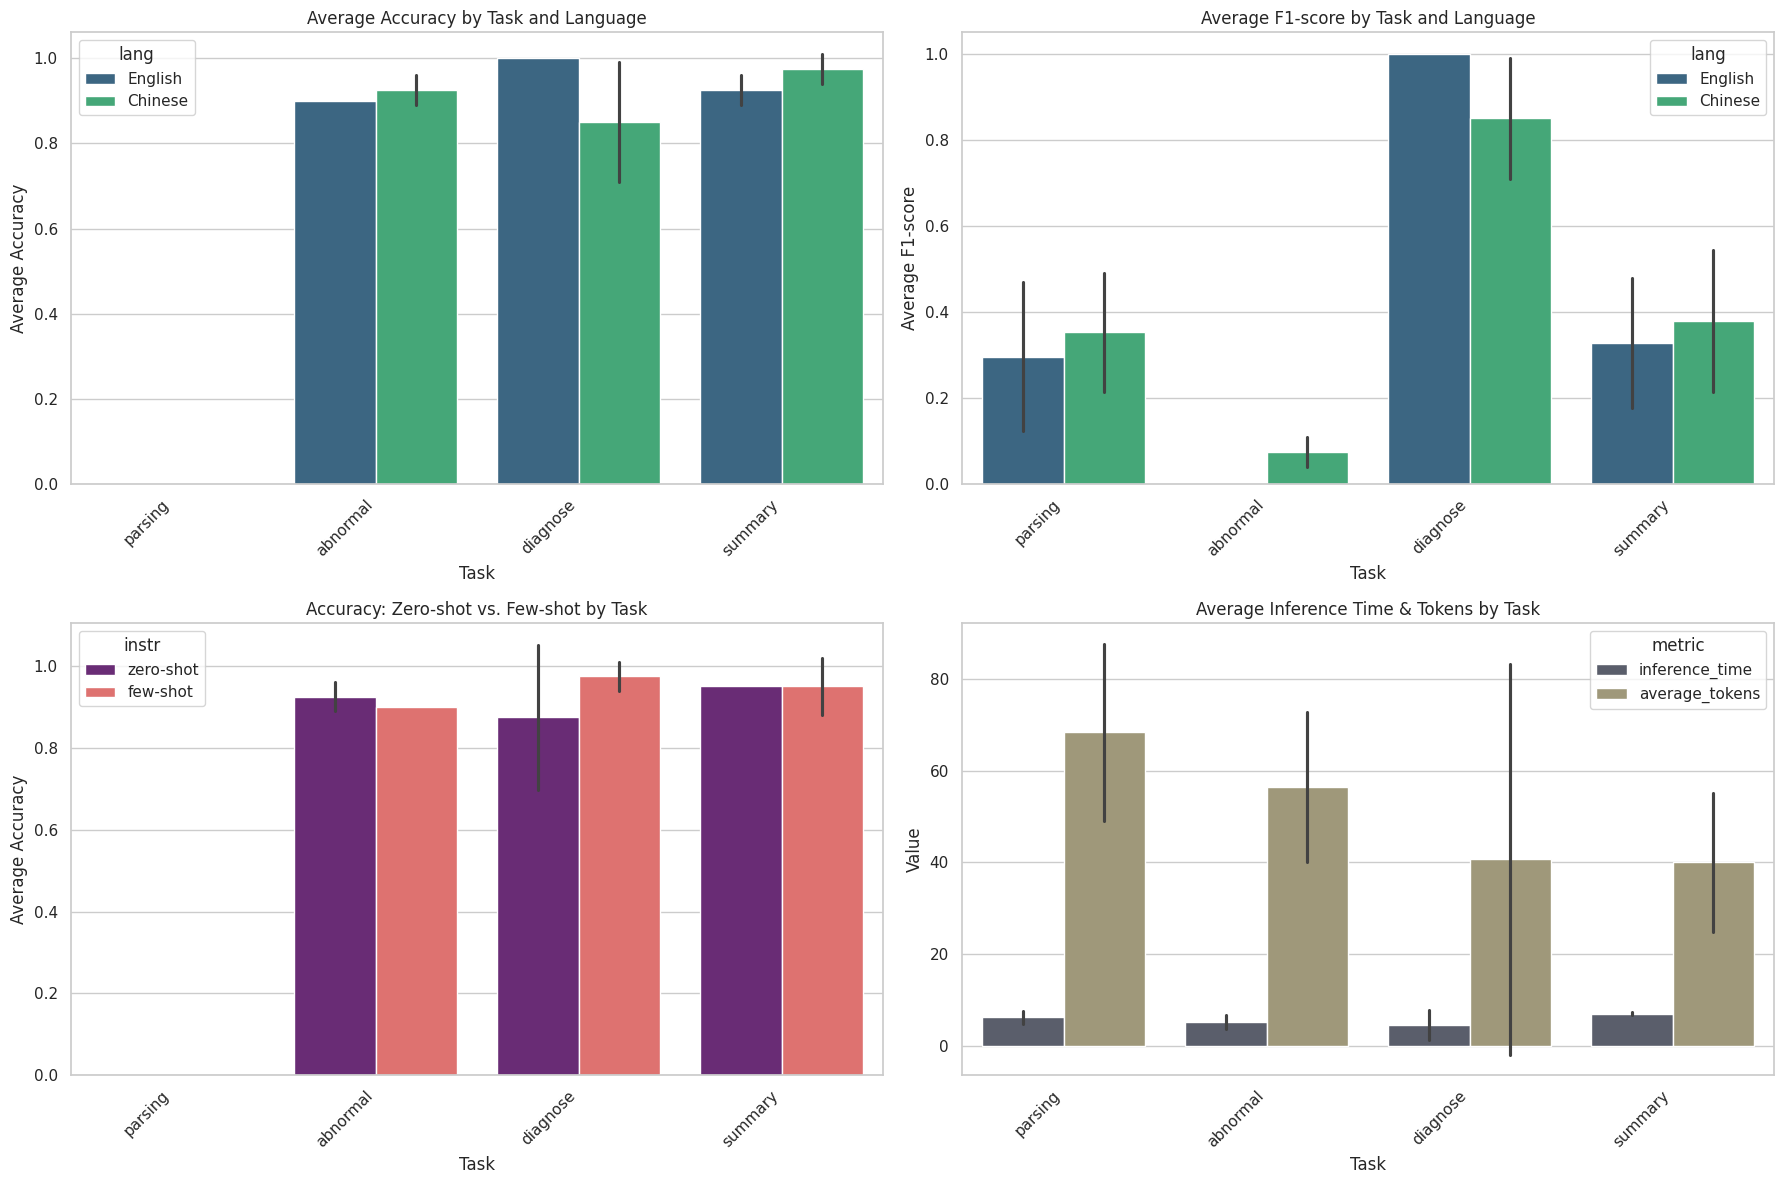

/tmp/ipython-input-13-1234898941.py:114: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(


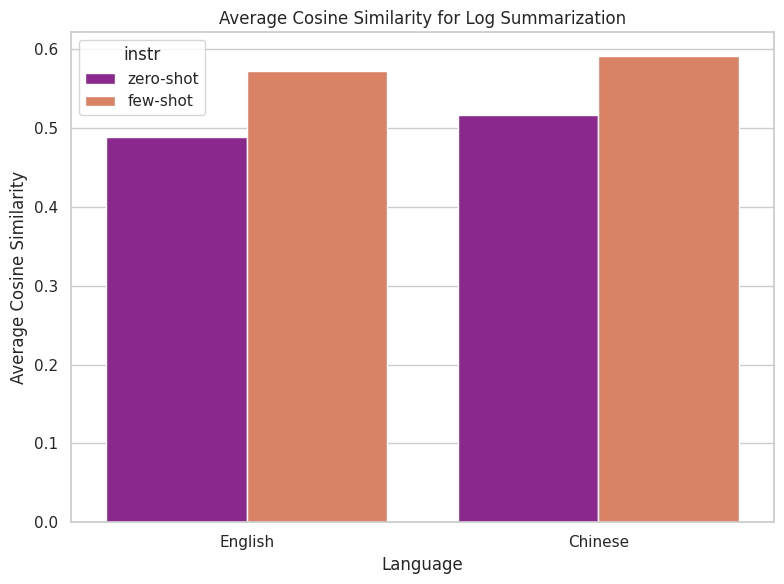


Analysis complete. Check the generated table and plots above.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os


results_file = "mistral_benchmark_results.csv"
if os.path.exists(results_file):
    df_results = pd.read_csv(results_file)
    print(f"Results loaded from {results_file}. Shape: {df_results.shape}")
    print("\nFirst 5 rows of the results DataFrame:")
    print(df_results.head())
else:
    print(f"Error: {results_file} not found. Please ensure run_benchmark.py was executed successfully.")
    exit()


print("\n--- Summary Table of Benchmarking Results ---")

summary_pivot = df_results.pivot_table(
    index=['task', 'lang', 'instr'],
    values=['accuracy', 'f1_score', 'inference_time', 'average_tokens', 'cosine_similarity'],
    aggfunc='mean'
)
print(summary_pivot)

print("\n--- Generating Visualizations ---")


sns.set_theme(style="whitegrid")
plt.figure(figsize=(18, 12))


plt.subplot(2, 2, 1)
sns.barplot(
    data=df_results,
    x='task',
    y='accuracy',
    hue='lang',
    ci='sd',
    palette='viridis'
)
plt.title('Average Accuracy by Task and Language')
plt.xlabel('Task')
plt.ylabel('Average Accuracy')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()


plt.subplot(2, 2, 2)
sns.barplot(
    data=df_results,
    x='task',
    y='f1_score',
    hue='lang',
    ci='sd',
    palette='viridis'
)
plt.title('Average F1-score by Task and Language')
plt.xlabel('Task')
plt.ylabel('Average F1-score')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.subplot(2, 2, 3)
sns.barplot(
    data=df_results,
    x='task',
    y='accuracy',
    hue='instr',
    ci='sd',
    palette='magma'
)
plt.title('Accuracy: Zero-shot vs. Few-shot by Task')
plt.xlabel('Task')
plt.ylabel('Average Accuracy')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()


plt.subplot(2, 2, 4)
df_melted_time_tokens = df_results.melt(
    id_vars=['task', 'lang', 'instr'],
    value_vars=['inference_time', 'average_tokens'],
    var_name='metric',
    value_name='value'
)
sns.barplot(
    data=df_melted_time_tokens,
    x='task',
    y='value',
    hue='metric',
    ci='sd',
    palette='cividis'
)
plt.title('Average Inference Time & Tokens by Task')
plt.xlabel('Task')
plt.ylabel('Value')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()

if 'cosine_similarity' in df_results.columns and df_results['task'].str.contains('summary').any():
    plt.figure(figsize=(8, 6))
    sns.barplot(
        data=df_results[df_results['task'] == 'summary'],
        x='lang',
        y='cosine_similarity',
        hue='instr',
        ci='sd',
        palette='plasma'
    )
    plt.title('Average Cosine Similarity for Log Summarization')
    plt.xlabel('Language')
    plt.ylabel('Average Cosine Similarity')
    plt.tight_layout()
    plt.show()

print("\nAnalysis complete. Check the generated table and plots above.")